In [22]:
# Vamos a realizar una prueba solo son la prediccion de latitudes
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
import sys
sys.path.append('../')
from Utils import utils_nn as utlnn


In [23]:
x_test = pd.read_excel("../Train_Test/Dataset_Separado/x_test.xlsx")
x_train = pd.read_excel("../Train_Test/Dataset_Separado/x_train.xlsx")
y_test = pd.read_excel("../Train_Test/Dataset_Separado/y_test.xlsx")
y_train = pd.read_excel("../Train_Test/Dataset_Separado/y_train.xlsx")




In [24]:
out_x_coord = [f'x_{i}' for i in range(1,101)]
y_train_x=y_train[out_x_coord]
y_test_x = y_test[out_x_coord]



In [628]:
l2_reg = 0.000
inputs = Input(shape=(9,))

encoded = Dense(9, activation='relu',kernel_regularizer=l2(l2_reg))(inputs)  # Compresión 8 V3 16 n 
decoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(encoded) #V3
encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(80, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(90, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)

decoded = Dense(100, activation='linear',kernel_regularizer=l2(l2_reg), name = 'x_output')(encoded)  # Reconstrucción a 100 puntos

autoencoder_x = Model(inputs, decoded)
autoencoder_x.compile(optimizer = 'adam', loss='mse')
autoencoder_x.summary()

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_59 (InputLayer)     │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_354 (Dense)               │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_356 (Dense)               │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_357 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_358 (Dense)               │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_359 (Dense)               │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ x_output (Dense)                │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112 (94.19 KB)

 Trainable params: 24,112 (94.19 KB)

 Non-trainable params: 0 (0.00 B)

In [629]:
history = autoencoder_x.fit(x_train,y_train_x,
                          epochs = 800,
                          batch_size = 120, 
                          validation_split = 0.1) 

Epoch 1/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4090.2561 - val_loss: 1855.9725
Epoch 2/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1666.9235 - val_loss: 1592.4210
Epoch 3/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1546.2745 - val_loss: 1570.0378
Epoch 4/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1510.6107 - val_loss: 1560.8712
Epoch 5/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1527.5055 - val_loss: 1534.8606
Epoch 6/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1458.2571 - val_loss: 1515.9386
Epoch 7/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1493.1228 - val_loss: 1507.6102
Epoch 8/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1435.8691 - val_loss: 1523.4061
Epoch 9/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1413.6450 - val_loss: 1385.9822
Epoch 10/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1354.2908 - val_loss: 1274.4858
Epoch 11/800
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1205.9772 - val_loss: 1143.6

In [630]:
loss = autoencoder_x.evaluate(x_test, y_test_x)
print(f'Pérdida en datos de Test: {loss}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.3245
Pérdida en datos de Test: 43.68592071533203


In [631]:
idx = 15 # Elegir una muestra para comparar

# Predicción de una muestra 
y_pred = autoencoder_x.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test_x.iloc[idx] # Se obtine Algo de tipo Serie
y_true=y_true.to_numpy() # Transform a Numpy array
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


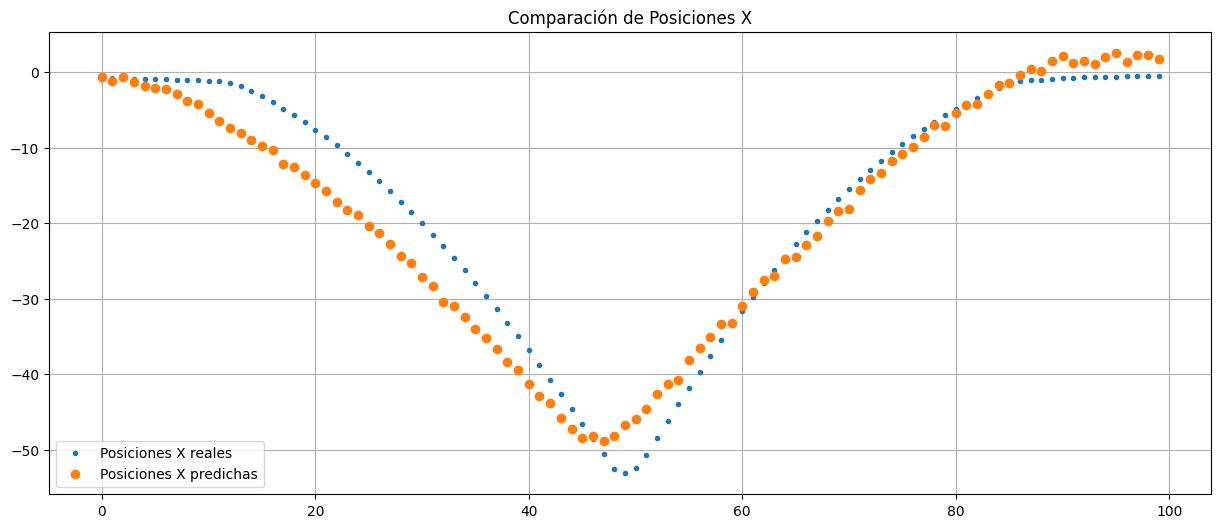

In [632]:
##Graficamos 
# Pos x
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones X reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones X predichas', linestyle = 'None',marker='o')
# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones X')
plt.legend()
plt.grid(True)
plt.show()

In [633]:
ecm, recm = utlnn.calculate_ECM_RECM(y_true,y_pred)
print(f'Error Cuadratico Medio:{ecm}, Raiz del Error Cuadratico Medio:{recm} [Km]')


Error Cuadratico Medio:17.20060103111611, Raiz del Error Cuadratico Medio:4.147360730767955 [Km]


In [634]:
save_model = False

if save_model == True:
  autoencoder_x.save('../modelos_entrenamiento/modelos_x/mod_x_800_130_vs10.keras')

In [635]:
# Pérdida en datos de Test: 30.48688316345215  / mod_x_800_130_vs10 (Despues de 55 pasadas)
# 